In [1]:
import tensorflow as tf

In [2]:
from tensorflow.examples.tutorials.mnist import input_data

In [3]:
mnist = input_data.read_data_sets('MNIST_Data_Set/', one_hot = True)

Extracting MNIST_Data_Set/train-images-idx3-ubyte.gz
Extracting MNIST_Data_Set/train-labels-idx1-ubyte.gz
Extracting MNIST_Data_Set/t10k-images-idx3-ubyte.gz
Extracting MNIST_Data_Set/t10k-labels-idx1-ubyte.gz


In [4]:
type(mnist)

tensorflow.contrib.learn.python.learn.datasets.base.Datasets

In [5]:
len(mnist.train.images)

55000

In [6]:
(mnist.train.images)[0]

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.  

In [7]:
image1 = mnist.train.images[0].reshape(28, 28)

In [8]:
import matplotlib.pyplot as plt

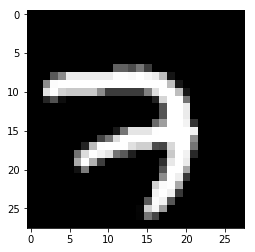

In [9]:
plt.imshow(image1, cmap = 'gist_gray')
plt.show()

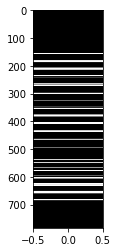

In [10]:
plt.imshow(mnist.train.images[1].reshape(784, 1), cmap = 'gist_gray', aspect = 0.004)
plt.show()

In [11]:
mnist.train.images.shape

(55000, 784)

In [12]:
mnist.train.images[1].shape

(784,)

In [13]:
plt.imshow(mnist.train.images[1].reshape(1, 784), aspect=99.9, cmap = 'gist_gray')

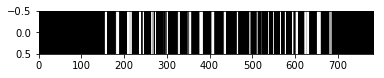

In [14]:
plt.show()

# Placeholder

In [15]:
xph = tf.placeholder(tf.float32, [None,784])

In [16]:
y_true = tf.placeholder(tf.float32, [None, 10])

# Variable

In [17]:
import numpy as np

In [18]:
w = tf.Variable(tf.random_normal([784, 10]))

In [19]:
b = tf.Variable(tf.random_normal([10]))

# Graph

In [20]:
y_model = tf.matmul(xph, w) + b

# Loss Function

In [21]:
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels = y_true, logits = y_model))

# Optimizer

In [22]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.3)

In [23]:
train = optimizer.minimize(cross_entropy)

# Variable initialiser

In [24]:
init = tf.global_variables_initializer()

# Session

In [32]:
with tf.Session() as sess:
    
    sess.run(init)
    
    for i in range(6000):
        
        batch_x, batch_y = mnist.train.next_batch(100)
        
        sess.run(train, feed_dict = {xph:batch_x, y_true:batch_y})
        
    pred = tf.equal(tf.argmax(y_model, 1), tf.argmax(y_true, 1))
    
    accuracy = tf.reduce_mean(tf.cast(pred, tf.float32))
    
    k = sess.run(accuracy, feed_dict = {xph:mnist.test.images, y_true:mnist.test.labels})

print("Percentage accuracy: ",(k*100))

Percentage accuracy:  90.1700019836
